# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d200/7037ec05b97576da1bd9db5e3ea6a322a577bc833b0dc772238248ef.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Toronto, Ontario, Canada**, and the stations the data comes from are shown on the map below.

In [7]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(200,'7037ec05b97576da1bd9db5e3ea6a322a577bc833b0dc772238248ef')

FileNotFoundError: File b'data/C2A2_data/BinSize_d200.csv' does not exist

In [8]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

# def leaflet_plot_stations(file):

#     df = pd.read_csv('{0}'.format(file))

#     station_locations_by_hash = df[df['hash'] == "7037ec05b97576da1bd9db5e3ea6a322a577bc833b0dc772238248ef"]

#     lons = station_locations_by_hash['LONGITUDE'].tolist()
#     lats = station_locations_by_hash['LATITUDE'].tolist()

#     plt.figure(figsize=(8,8))

#     plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

#     return mplleaflet.display()

# leaflet_plot_stations("weather_data.csv")

In [9]:
#!python -m pip install --upgrade pip

In [10]:
#!pip install mplleaflet

In [11]:
df = pd.read_csv("weather_data.csv")

df = df.sort_values(by=["Date"])

current_date = ""
a = []


for i in df["Date"]:
    if current_date ==  i:
        continue
    else:
        current_date = i
        df1 = df.loc[(df["Date"] == current_date)]["Data_Value"]/10
        temp_max = df1.max()
        temp_min = df1.min()
        b = {"Date" : current_date, "Max Temp" : temp_max, "Min Temp" : temp_min}
        a.append(b)

c = pd.DataFrame(a)
c = c[["Date", "Max Temp", "Min Temp"]]



In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib notebook

<IPython.core.display.Javascript object>


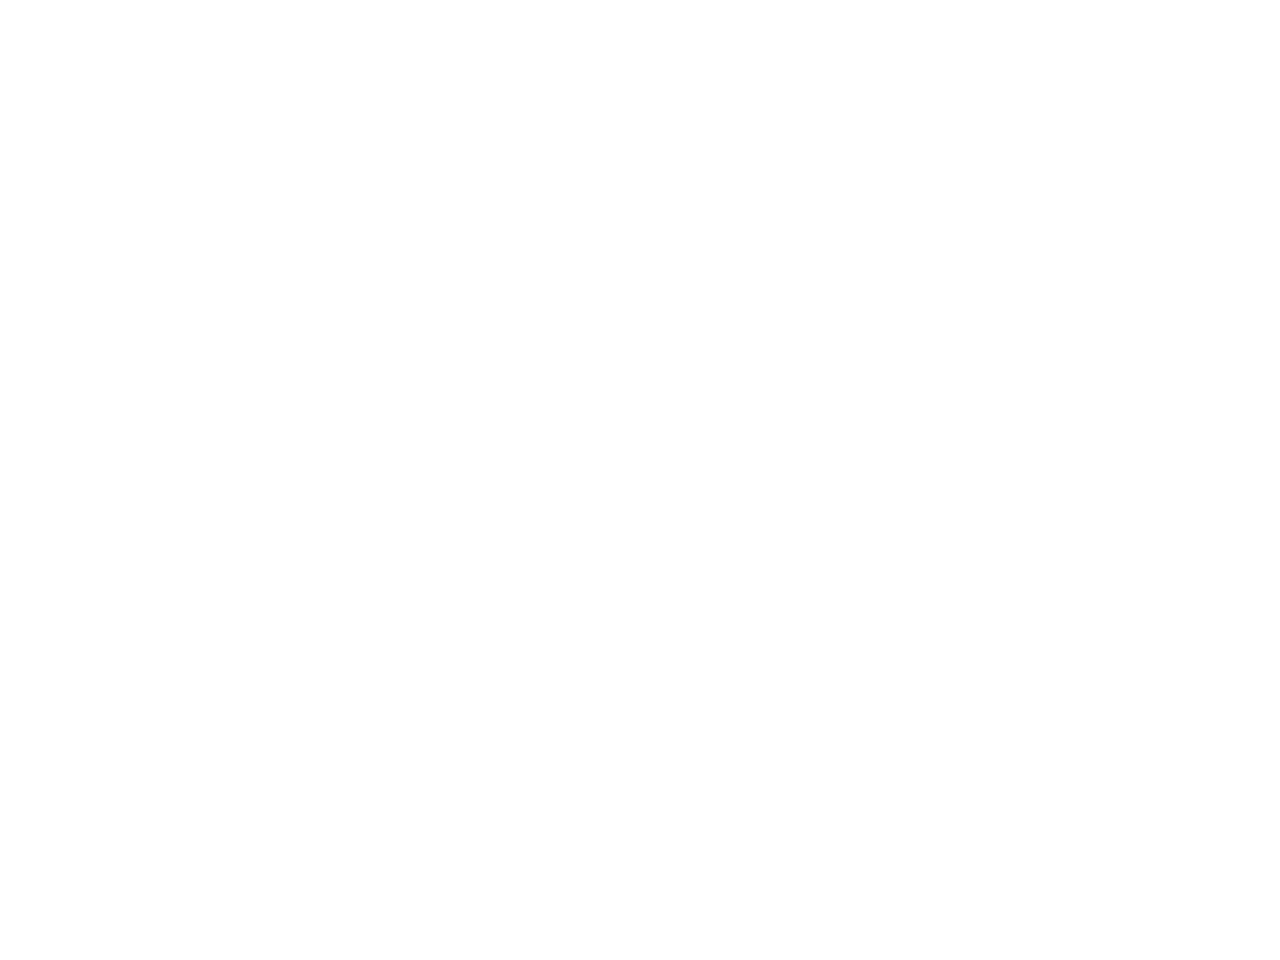

<IPython.core.display.Javascript object>


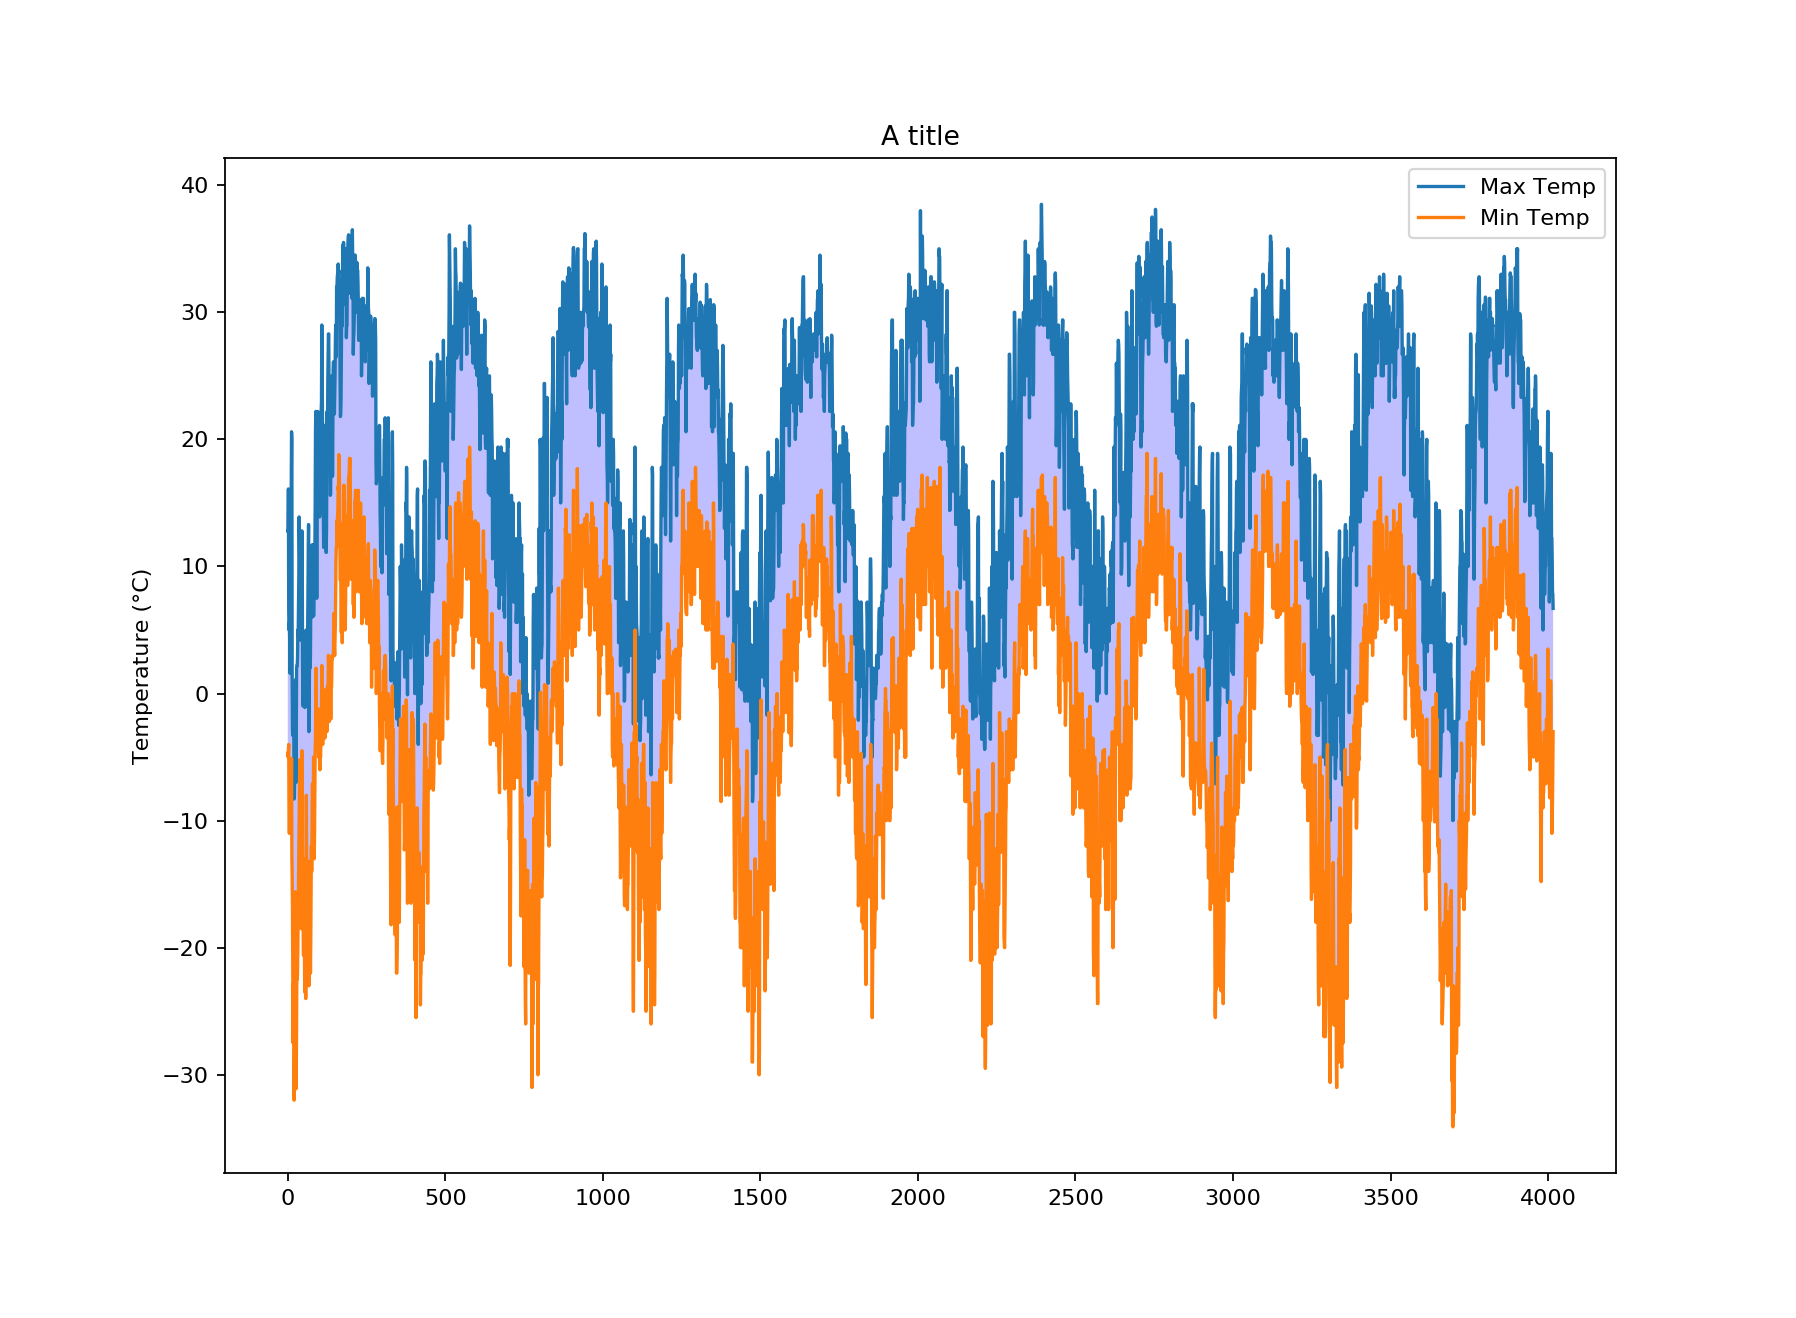

In [17]:
#linear_data = np.array([1,2,3,4,5,6,7,8])
max_data = c["Max Temp"]
min_data = c["Min Temp"]
#dates = pd.to_datetime(c['Date'])
#observation_dates = dates
#observation_dates = list(dates)

#dates = pd.to_datetime(c['Date'], format = "%Y/%m/%d", )
#x_axis = dates

plt.figure()
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# plot the linear data and the exponential data
plt.plot(max_data, '-', min_data, '-')

plt.legend(['Max Temp', 'Min Temp'])

degree_sign= u'\N{DEGREE SIGN}'

#plt.xlabel('Days')
plt.ylabel('Temperature ({0}C)'.format(degree_sign))
plt.title('A title')

# fill the area between the linear data and exponential data
plt.gca().fill_between(range(len(max_data)), 
                       max_data, min_data, 
                       facecolor='blue', 
                       alpha=0.25)

#observation_dates = np.arange('2005-01-01', '2014-12-31', dtype='datetime64[D]')

In [19]:
d = c[["Date"] > "2014-12-31"]

TypeError: '>' not supported between instances of 'list' and 'str'

In [23]:
max_data = c["Max Temp"]
min_data = c["Min Temp"]

plt.figure()
plt.plot(min_data.values, 'b', label = 'record low')
plt.plot(max_data.values, 'r', label = 'record high')
#plt.scatter(broken_min, temp_min_15.iloc[broken_min], s = 10, c = 'g', label = 'broken low')
#plt.scatter(broken_max, temp_max_15.iloc[broken_max], s = 10, c = 'm', label = 'broken high')
plt.gca().axis([-5, 370, -150, 650])
plt.xticks(range(0, len(min_data), 20), min_data.index[range(0, len(min_data), 20)], rotation = '45')
plt.xlabel('Day of the Year')
plt.ylabel('Temperature (Tenths of Degrees C)')
plt.title('Temperature Summary Plot near Singapore')
plt.legend(loc = 4, frameon = False)
plt.gca().fill_between(range(len(min_data)), min_data['Data_Value'], min_data['Data_Value'], facecolor = 'yellow', alpha = 0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

<IPython.core.display.Javascript object>

KeyError: 'Data_Value'

In [21]:
max_data = c["Max Temp"]
min_data = c["Min Temp"]

In [22]:
max_data.values

array([12.8, 12.8, 16.1, ...,  8. ,  7.8,  6.7])

In [25]:
max_data

0       12.8
1       12.8
2       16.1
3        6.7
4        5.0
5        5.6
6        4.4
7        1.6
8        5.0
9        5.6
10       3.0
11      16.1
12      20.6
13      20.0
14       1.1
15      -3.0
16      -3.3
17      -3.0
18      -1.0
19      -0.6
20      -8.3
21      -8.1
22      -6.0
23      -1.0
24       0.6
25       1.1
26      -7.0
27      -3.5
28       2.0
29       2.2
        ... 
3987    12.2
3988    10.6
3989     7.8
3990     9.3
3991    10.0
3992    10.0
3993    12.0
3994    14.4
3995    15.0
3996    15.6
3997    16.1
3998    20.0
3999    22.2
4000    22.2
4001    11.7
4002    11.7
4003    12.2
4004     7.2
4005     9.0
4006    12.0
4007    16.0
4008    18.3
4009    18.9
4010    17.2
4011    12.2
4012    12.2
4013    10.6
4014     8.0
4015     7.8
4016     6.7
Name: Max Temp, Length: 4017, dtype: float64